# 1. Import library

In [1]:
# Dataframe manipulation
import numpy as np
import pandas as pd
import math

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# sns.set(style = 'whitegrid',context = 'notebook')

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# Modelling Helpers:
# from sklearn.preprocessing import Imputer, Normalizer, scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, ShuffleSplit, cross_validate
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
# Evaluation metrics for Classification
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
# Evaluation metrics for Regression 
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, roc_auc_score, auc,
                             precision_score, recall_score, roc_curve, precision_recall_curve,
                             precision_recall_fscore_support, f1_score,
                             precision_recall_fscore_support)

# Configuration
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

print("Setup complete...")

C:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Setup complete...


# 2. Setup

In [2]:
models = []
models.append(('KNN', KNeighborsClassifier()))
# models.append(('SVC', SVC(kernel="linear")))
# models.append(('LSVC', SVC(kernel="rbf")))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('LGB',LGBMClassifier()))
models.append(('ADA',AdaBoostClassifier()))
models.append(('QDA',QuadraticDiscriminantAnalysis()))
models.append(('NN',MLPClassifier()))
models.append(('XGB',XGBClassifier()))

In [3]:
# Test options and evaluation metric
seed = 9
scoring = 'accuracy'

In [4]:
def ModelEvaluation(models):
    
    for name,model in models:
        print(name)
        model.fit(X_train, y_train)
        
        print('==========================================================')
        print('Train set')
        y_train_pred = model.predict(X_train)
        print('Accuracy: ', accuracy_score(y_train, list(y_train_pred)))
        print('ROC AUC Score: ', roc_auc_score(y_train, list(y_train_pred)))
        cm_df = pd.DataFrame(confusion_matrix(y_train,list(y_train_pred)), index=model.classes_,columns=model.classes_)
        cm_df.index.name = 'Predicted'
        cm_df.columns.name = 'True'
        print('Confusion matrix')
        print(cm_df)
        print(classification_report(y_train, list(y_train_pred)))
  
        print('----------------------------------------------------------')
        print('Test set')
        y_test_pred = model.predict(X_test)
        print('Accuracy: ', accuracy_score(y_test, list(y_test_pred)))
        print('ROC AUC Score: ', roc_auc_score(y_test, list(y_test_pred)))
        cm_df = pd.DataFrame(confusion_matrix(y_test,list(y_test_pred)), index=model.classes_,columns=model.classes_)
        cm_df.index.name = 'Predicted'
        cm_df.columns.name = 'True'
        print('Confusion matrix')
        print(cm_df)
        print(classification_report(y_test, list(y_test_pred)))
        print('==========================================================')
        

In [5]:
#tsne
from sklearn.manifold import TSNE

def tsne(x,y):
        i=4
        datax=x
        datay=y
        tsne=TSNE(n_components=2,random_state=0)
        x_2d=tsne.fit_transform(datax)
        target_length=range(len(datax))
        plt.figure(figsize=(6,5))
        colors='r','b'
        label='normal','bankrupt'
        label2="Tsne after over-sampling "
        for i,c,label in zip(target_length,colors,label):
            plt.scatter(x_2d[datay==i,0],x_2d[datay==i,1],c=c,label=label)
        plt.legend()
        plt.title(label2)
        plt.show()

# 3. Experiments

### Exp01

In [6]:
df = pd.read_csv('../ds-exp01.csv')
df.shape

(768, 9)

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.133413,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.133413,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.239130,0.133413,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1


In [8]:
X = df.drop(['Outcome'],axis=1)  #independent columns
y = df['Outcome']    #target column i.e price range

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify = y)

print(X_train.shape, X_test.shape)
print(y_train.sum()/len(y_train))
print(y_test.sum()/len(y_test))

(576, 8) (192, 8)
0.3489583333333333
0.3489583333333333


In [9]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
432,0.058824,0.232258,0.510204,0.043478,0.055288,0.241309,0.191716,0.016667
453,0.117647,0.483871,0.489796,0.239130,0.133413,0.028630,0.321947,0.850000
706,0.588235,0.458065,0.489796,0.239130,0.133413,0.288344,0.078138,0.150000
606,0.058824,0.883871,0.551020,0.380435,0.335337,0.445808,0.503843,0.016667
118,0.235294,0.341935,0.367347,0.173913,0.133413,0.204499,0.155850,0.016667


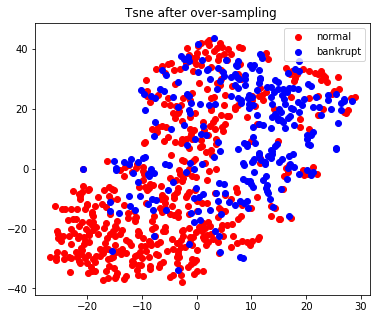

In [10]:
tsne(X,y) 

In [11]:
# evaluate each model in turn
results = {}
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results[name] = cv_results
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.737780 (0.027943)
LR: 0.764035 (0.049133)
DT: 0.677102 (0.041544)
GNB: 0.741410 (0.053950)
RF: 0.760557 (0.061915)
GB: 0.763944 (0.048261)
LGB: 0.749970 (0.066404)
ADA: 0.753448 (0.050878)
QDA: 0.725802 (0.062935)
NN: 0.765729 (0.044923)
XGB: 0.765668 (0.046968)


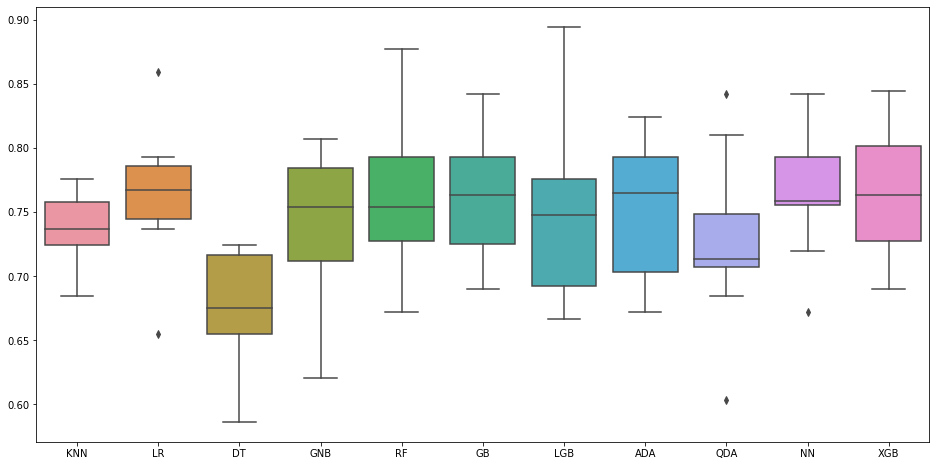

In [12]:
results_df = pd.DataFrame(results)
results_df

plt.figure(figsize=(16,8))
sns.boxplot(data=results_df)
plt.show()

In [13]:
ModelEvaluation(models)

KNN
Train set
Accuracy:  0.8263888888888888
ROC AUC Score:  0.8054925373134328
Confusion matrix
True         0    1
Predicted          
0          328   47
1           53  148
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       375
           1       0.76      0.74      0.75       201

    accuracy                           0.83       576
   macro avg       0.81      0.81      0.81       576
weighted avg       0.83      0.83      0.83       576

----------------------------------------------------------
Test set
Accuracy:  0.71875
ROC AUC Score:  0.6766567164179105
Confusion matrix
True         0   1
Predicted         
0          102  23
1           31  36
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       125
           1       0.61      0.54      0.57        67

    accuracy                           0.72       192
   macro avg       0.69      0.68      0.68       192
weighted a

Train set
Accuracy:  0.7743055555555556
ROC AUC Score:  0.7274029850746269
Confusion matrix
True         0    1
Predicted          
0          331   44
1           86  115
              precision    recall  f1-score   support

           0       0.79      0.88      0.84       375
           1       0.72      0.57      0.64       201

    accuracy                           0.77       576
   macro avg       0.76      0.73      0.74       576
weighted avg       0.77      0.77      0.77       576

----------------------------------------------------------
Test set
Accuracy:  0.765625
ROC AUC Score:  0.7230447761194031
Confusion matrix
True         0   1
Predicted         
0          108  17
1           28  39
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       125
           1       0.70      0.58      0.63        67

    accuracy                           0.77       192
   macro avg       0.75      0.72      0.73       192
weighted avg 

### Exp02

### Exp03

### Exp04: Feature Selection

### Exp05: Generate features to capture missing pattern

### Exp06: Generate features for descriptive statistics

In [50]:
df = pd.read_csv('ds-exp06.csv')
df.shape

(768, 17)

In [51]:
X = df.drop(['Outcome'],axis=1)  #independent columns
y = df['Outcome']    #target column i.e price range


In [52]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify = y)

print(X_train.shape, X_test.shape)
print(y_train.sum()/len(y_train))
print(y_test.sum()/len(y_test))

(576, 16) (192, 16)
0.3489583333333333
0.3489583333333333


In [53]:
# evaluate each model in turn
results = {}
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results[name] = cv_results
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.741379 (0.037201)
LR: 0.762281 (0.042334)
DT: 0.666606 (0.056422)
GNB: 0.730944 (0.054004)
RF: 0.748336 (0.037549)
GB: 0.751815 (0.027358)
LGB: 0.751724 (0.050421)
ADA: 0.753600 (0.039328)
QDA: 0.722111 (0.039315)
NN: 0.758893 (0.054096)
XGB: 0.758802 (0.039362)


In [54]:
results_df = pd.DataFrame(results)
results_df

,KNN,LR,DT,GNB,RF,GB,LGB,ADA,QDA,NN,XGB
0,0.706897,0.724138,0.603448,0.741379,0.724138,0.741379,0.758621,0.689655,0.706897,0.706897,0.724138
1,0.741379,0.793103,0.724138,0.724138,0.706897,0.758621,0.689655,0.706897,0.758621,0.758621,0.741379
2,0.775862,0.758621,0.672414,0.655172,0.775862,0.741379,0.775862,0.758621,0.672414,0.706897,0.741379
3,0.689655,0.655172,0.603448,0.637931,0.672414,0.706897,0.689655,0.741379,0.689655,0.655172,0.724138
4,0.775862,0.793103,0.637931,0.810345,0.775862,0.741379,0.810345,0.741379,0.758621,0.810345,0.758621
5,0.724138,0.775862,0.793103,0.793103,0.793103,0.775862,0.793103,0.810345,0.810345,0.793103,0.793103
6,0.807018,0.754386,0.631579,0.736842,0.736842,0.771930,0.736842,0.754386,0.701754,0.736842,0.789474
7,0.719298,0.771930,0.631579,0.684211,0.771930,0.754386,0.789474,0.771930,0.701754,0.771930,0.771930
8,0.701754,0.807018,0.701754,0.771930,0.789474,0.807018,0.807018,0.824561,0.701754,0.824561,0.842105
9,0.771930,0.789474,0.666667,0.754386,0.736842,0.719298,0.666667,0.736842,0.719298,0.824561,0.701754


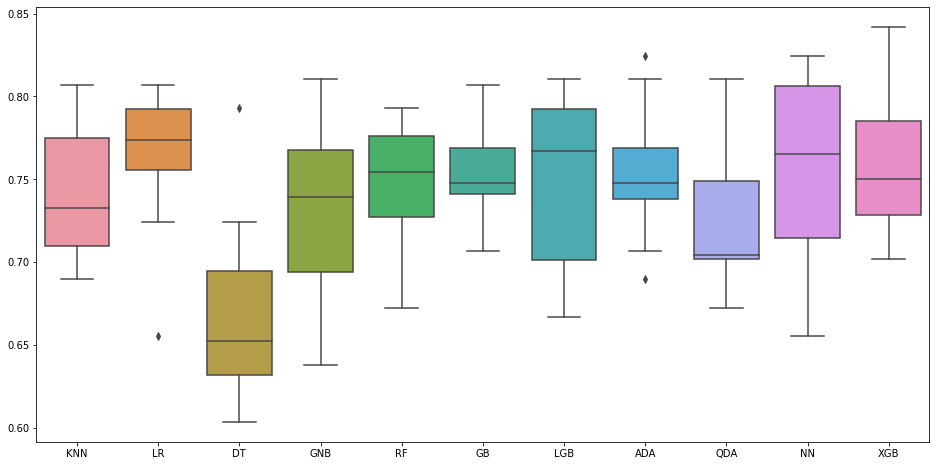

In [55]:
plt.figure(figsize=(16,8))
sns.boxplot(data=results_df)
plt.show()

In [56]:
ModelEvaluation(models)

KNN
Train set
Accuracy:  0.8211805555555556
ROC AUC Score:  0.7980298507462686
Confusion matrix
True         0    1
Predicted          
0          328   47
1           56  145
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       375
           1       0.76      0.72      0.74       201

    accuracy                           0.82       576
   macro avg       0.80      0.80      0.80       576
weighted avg       0.82      0.82      0.82       576

----------------------------------------------------------
Test set
Accuracy:  0.7291666666666666
ROC AUC Score:  0.6881194029850747
Confusion matrix
True         0   1
Predicted         
0          103  22
1           30  37
              precision    recall  f1-score   support

           0       0.77      0.82      0.80       125
           1       0.63      0.55      0.59        67

    accuracy                           0.73       192
   macro avg       0.70      0.69      0.69       192

Train set
Accuracy:  0.7777777777777778
ROC AUC Score:  0.7381492537313433
Confusion matrix
True         0    1
Predicted          
0          326   49
1           79  122
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       375
           1       0.71      0.61      0.66       201

    accuracy                           0.78       576
   macro avg       0.76      0.74      0.75       576
weighted avg       0.77      0.78      0.77       576

----------------------------------------------------------
Test set
Accuracy:  0.7604166666666666
ROC AUC Score:  0.7225074626865671
Confusion matrix
True         0   1
Predicted         
0          106  19
1           27  40
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       125
           1       0.68      0.60      0.63        67

    accuracy                           0.76       192
   macro avg       0.74      0.72      0.73       192
wei

### Aggregation features

### PCA features

### Other patterns

# Similarity measure

In [63]:
df = pd.read_csv('ds-exp07.csv')
df.shape

(768, 22)

In [64]:
X = df.drop(['Outcome'],axis=1)  #independent columns
y = df['Outcome']    #target column i.e price range

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify = y)

print(X_train.shape, X_test.shape)
print(y_train.sum()/len(y_train))
print(y_test.sum()/len(y_test))

(576, 21) (192, 21)
0.3489583333333333
0.3489583333333333


In [65]:
# evaluate each model in turn
results = {}
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results[name] = cv_results
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.738113 (0.053693)
LR: 0.760617 (0.056610)
DT: 0.678826 (0.045237)
GNB: 0.732789 (0.058903)
RF: 0.753660 (0.044118)
GB: 0.739746 (0.032536)
LGB: 0.751815 (0.048688)
ADA: 0.746733 (0.051274)
QDA: 0.739685 (0.044662)
NN: 0.731095 (0.036806)
XGB: 0.743194 (0.040150)


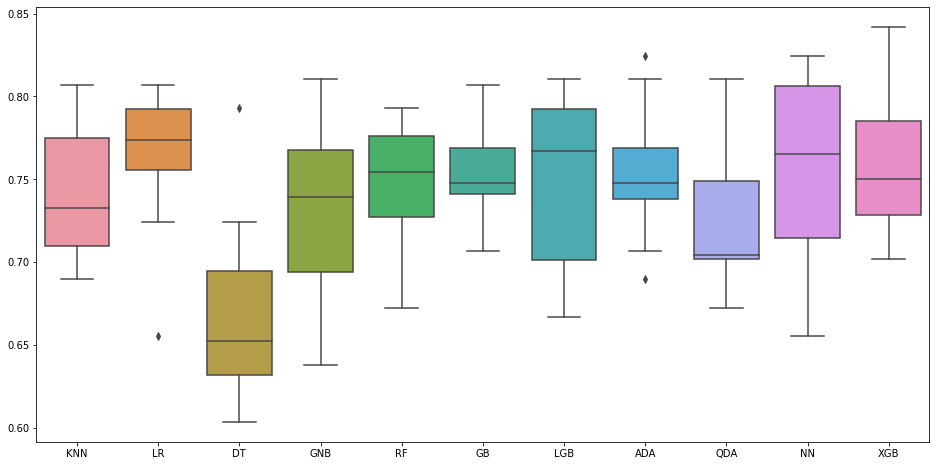

In [66]:
plt.figure(figsize=(16,8))
sns.boxplot(data=results_df)
plt.show()

In [67]:
ModelEvaluation(models)

KNN
Train set
Accuracy:  0.7986111111111112
ROC AUC Score:  0.7633830845771143
Confusion matrix
True         0    1
Predicted          
0          330   45
1           71  130
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       375
           1       0.74      0.65      0.69       201

    accuracy                           0.80       576
   macro avg       0.78      0.76      0.77       576
weighted avg       0.79      0.80      0.80       576

----------------------------------------------------------
Test set
Accuracy:  0.7552083333333334
ROC AUC Score:  0.7046567164179104
Confusion matrix
True         0   1
Predicted         
0          109  16
1           31  36
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       125
           1       0.69      0.54      0.61        67

    accuracy                           0.76       192
   macro avg       0.74      0.70      0.71       192

Train set
Accuracy:  0.78125
ROC AUC Score:  0.7512039800995025
Confusion matrix
True         0    1
Predicted          
0          319   56
1           70  131
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       375
           1       0.70      0.65      0.68       201

    accuracy                           0.78       576
   macro avg       0.76      0.75      0.76       576
weighted avg       0.78      0.78      0.78       576

----------------------------------------------------------
Test set
Accuracy:  0.7552083333333334
ROC AUC Score:  0.7254328358208956
Confusion matrix
True         0   1
Predicted         
0          103  22
1           25  42
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       125
           1       0.66      0.63      0.64        67

    accuracy                           0.76       192
   macro avg       0.73      0.73      0.73       192
weighted avg  

## Resampling techniques

### Using Smote

In [ ]:
df = pd.read_csv('data/ds-exp05.csv')
df.shape
X = df.drop(['class'],axis=1)  #independent columns
y = df['class']    #target column i.e price range

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify = y)

print(X_train.shape, X_test.shape)
print(y_train.sum()/len(y_train))
print(y_test.sum()/len(y_test))

In [ ]:
import collections
from imblearn.over_sampling import SMOTE, ADASYN

In [ ]:
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_sample(X_train, y_train)
print('Resampled dataset class 1 using SMOTE {}'.format(y_smote.tolist().count(1)))
print('Resampled dataset class 0 using SMOTE {}'.format(y_smote.tolist().count(0)))


In [ ]:
X_train = pd.DataFrame(X_smote,columns = X.columns)
y_train = y_smote

In [ ]:
X_train.head()

In [ ]:
# evaluate each model in turn
results = {}
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results[name] = cv_results
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [ ]:
results_df = pd.DataFrame(results)
results_df

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(data=results_df)
plt.show()

In [ ]:
ModelEvaluation(models)

In [ ]:
#tsne
from sklearn.manifold import TSNE

### using t-sne to visualize the cleaning data
def tsne(x,y):
        i=4
        datax=x
        datay=y
        tsne=TSNE(n_components=2,random_state=0)
        x_2d=tsne.fit_transform(datax)
        target_length=range(len(datax))
        plt.figure(figsize=(6,5))
        colors='r','b'
        label='normal','bankrupt'
        label2="Tsne after over-sampling "
        for i,c,label in zip(target_length,colors,label):
            plt.scatter(x_2d[datay==i,0],x_2d[datay==i,1],c=c,label=label)
        plt.legend()
        plt.title(label2)
        plt.show()

tsne(X_smote,y_smote) 
